## Behavior Analysis

## Assesing Sex as a Statistically Significant Factor

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg

In [61]:
def detec_outlier(df, var_name, var_group):
    '''[DataFrame, str, str -> DataFrame]
    Outlier detection based on absolute deviaton from the median.
    Returns a copy of the original DataFrame without the indexes deemed as outliers'''
    clean_df = df.copy()
    outliers_idx = []
    for var_ in var_name:
        for group in df[var_group].unique():
            outliers = pg.madmedianrule(df[var_][df[var_group]==group])
            for ii in df[var_][df[var_group]==group][outliers].index.values:
                outliers_idx.append(ii)
    outliers_idx = set(outliers_idx)
    clean_df.drop(outliers_idx, inplace = True)
    return clean_df, outliers_idx

## Open Field

In [62]:
of_raw = pd.read_csv('/Users/labc02/Documents/PDCB_data/Behavior/Open_Field/OF_Data.csv')

In [63]:
of_raw.columns

Index(['Sub_Name', 'Sub_Group', 'Sex', 'Genotype', 'Entries_Periphery',
       'Entries_Center', 'Time_Periphery(Sec)', 'Time_Center(Sec)',
       'Time_Periphery(%)', 'Time_Center(%)', 'Total_Distance',
       'Distance_Periphery', 'Distance_Center', 'Distance_Periphery(%)',
       'Distance_ Center(%)', 'Resting_Time_Periphery', 'Resting_Time_Center',
       'Resting_Time_Total', 'Mean_Speed', 'Max_Speed', 'Crosses'],
      dtype='object')

In [64]:
of_raw.rename(columns={'Subject Name':'Name', 'Subject Group': 'Group', 'Subject Gender':'Sex', 'Subject Genotype':'Genotype', 'Total Distance':'Distance', 'Time in Zone (%) - Center':'Time_in_Center'}, inplace = True)

### Sample size

In [65]:
of_raw.groupby('Genotype')['Total_Distance'].count()

Genotype
KO    16
WT    16
Name: Total_Distance, dtype: int64

#### Check Normality for Total Distance, Corsses, Time in Center per group

In [66]:
for var_ in ['Total_Distance', 'Crosses', 'Time_Center(%)', 'Resting_Time_Total', 'Mean_Speed', 'Max_Speed']:
    print(f'Normality test (Shapiro), {var_}')
    print(pg.normality(of_raw, dv=var_, group='Sub_Group'))

Normality test (Shapiro), Total_Distance
            W      pval  normal
KOF  0.893278  0.250967    True
KOM  0.898312  0.278996    True
WTF  0.877492  0.215544    True
WTM  0.908242  0.303764    True
Normality test (Shapiro), Crosses
            W      pval  normal
KOF  0.903123  0.308162    True
KOM  0.952837  0.739771    True
WTF  0.917318  0.448847    True
WTM  0.935471  0.535118    True
Normality test (Shapiro), Time_Center(%)
            W      pval  normal
KOF  0.929021  0.507204    True
KOM  0.944262  0.653440    True
WTF  0.843711  0.107567    True
WTM  0.910015  0.315979    True
Normality test (Shapiro), Resting_Time_Total
            W      pval  normal
KOF  0.822821  0.049957   False
KOM  0.872326  0.158812    True
WTF  0.777844  0.024562   False
WTM  0.915678  0.357658    True
Normality test (Shapiro), Mean_Speed
            W      pval  normal
KOF  0.953658  0.747984    True
KOM  0.947890  0.689947    True
WTF  0.896464  0.310107    True
WTM  0.921072  0.401187    True
No

#### Check homoscedasticity; Leven's Test

In [67]:
for var_ in ['Total_Distance', 'Crosses', 'Time_Center(%)', 'Resting_Time_Total', 'Mean_Speed', 'Max_Speed']:
    print(f'Homoscedasticy (Leven\'s test), {var_}')
    print(pg.homoscedasticity(of_raw, dv=var_, group='Sub_Group'))

Homoscedasticy (Leven's test), Total_Distance
               W      pval  equal_var
levene  0.663818  0.581279       True
Homoscedasticy (Leven's test), Crosses
               W     pval  equal_var
levene  0.671402  0.57676       True
Homoscedasticy (Leven's test), Time_Center(%)
               W      pval  equal_var
levene  3.033134  0.045714      False
Homoscedasticy (Leven's test), Resting_Time_Total
               W      pval  equal_var
levene  0.527022  0.667357       True
Homoscedasticy (Leven's test), Mean_Speed
               W      pval  equal_var
levene  1.205006  0.326094       True
Homoscedasticy (Leven's test), Max_Speed
              W      pval  equal_var
levene  0.34967  0.789663       True


#### Total Distance; normality passed, homoscedasticity passed -> N-way anova

In [68]:
pg.anova(data = of_raw, dv='Total_Distance', between = ['Sex', 'Genotype'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,6.407894e+04,1.0,6.407894e+04,0.107121,0.745881,0.003811
1,Genotype,4.793856e+06,1.0,4.793856e+06,8.013876,0.008497,0.222522
2,Sex * Genotype,4.093371e+05,1.0,4.093371e+05,0.684288,0.415109,0.023856
3,Residual,1.674944e+07,28.0,5.981945e+05,NaN,NaN,NaN


Significant Two-Way ANOVA; Genotype is identified as the only significant factor.
Thus, we got a significant Two-Way ANOVA that shows that Sex is not a significant factor, though. Not even by interaction with the significant factor; Genotype.

### Collapsing the Sex category leaves a two group comparison.

#### Normality check for Genotype, collapsing Sex

In [69]:
WT_mean = of_raw['Total_Distance'][of_raw['Genotype'] == 'WT'].mean()
WT_sem = of_raw['Total_Distance'][of_raw['Genotype'] == 'WT'].sem()
KO_mean = of_raw['Total_Distance'][of_raw['Genotype'] == 'KO'].mean()
KO_sem = of_raw['Total_Distance'][of_raw['Genotype'] == 'KO'].sem()
print(f'Total Distance: \n WT mean: {WT_mean}, +- {WT_sem} SEM \n KO mean: {KO_mean}, +- {KO_sem} SEM')

Total Distance: 
 WT mean: 3563.350625, +- 201.0180682290955 SEM 
 KO mean: 2793.3431250000003, +- 177.06963678808862 SEM


In [70]:
pg.normality(of_raw, dv='Total_Distance', group='Genotype')

,W,pval,normal
KO,0.900918,0.083137,True
WT,0.950741,0.501517,True


Normality Passed; t-test

In [71]:
pg.ttest(x=of_raw['Total_Distance'][of_raw['Genotype'] == 'WT'], y=of_raw['Total_Distance'][of_raw['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,2.874405,30,two-sided,0.007373,"[222.92, 1317.1]",1.016256,6.384,0.794281


Significant difference: p≤ 0.05, power=0.79

### Crosses
Same approach
Normality: Passed; Homoscedasticity: Passed

Test: Two-Way ANOVA

In [72]:
pg.anova(data = of_raw, dv='Crosses', between = ['Sex', 'Genotype'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,15.417815,1.0,15.417815,0.041089,0.840832,0.001465
1,Genotype,1315.880315,1.0,1315.880315,3.506872,0.071592,0.111305
2,Sex * Genotype,568.106987,1.0,568.106987,1.514027,0.228763,0.051299
3,Residual,10506.412698,28.0,375.229025,NaN,NaN,NaN


Same conclusion. Perform normality for collapsed category: Sex

In [73]:
pg.normality(of_raw, dv='Crosses', group='Genotype')

,W,pval,normal
KO,0.949704,0.485010,True
WT,0.934793,0.290035,True


In [74]:
WT_mean = of_raw['Crosses'][of_raw['Genotype'] == 'WT'].mean()
WT_sem = of_raw['Crosses'][of_raw['Genotype'] == 'WT'].sem()
KO_mean = of_raw['Crosses'][of_raw['Genotype'] == 'KO'].mean()
KO_sem = of_raw['Crosses'][of_raw['Genotype'] == 'KO'].sem()
print(f'Crosses: \n WT mean: {WT_mean}, +- {WT_sem} SEM \n KO mean: {KO_mean}, +- {KO_sem} SEM')

Crosses: 
 WT mean: 79.4375, +- 5.664192168055977 SEM 
 KO mean: 66.5, +- 3.758324094593227 SEM


In [75]:
pg.ttest(x=of_raw['Crosses'][of_raw['Genotype'] == 'WT'], y=of_raw['Crosses'][of_raw['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.903231,30,two-sided,0.066645,"[-0.95, 26.82]",0.672894,1.295,0.453208


### Resting Time (Immobilitiy); small deviations from normality, Levene passed; Two-way anova

In [76]:
pg.anova(data = of_raw, dv='Resting_Time_Total', between = ['Sex', 'Genotype'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,73.180504,1.0,73.180504,0.114017,0.738135,0.004056
1,Genotype,3098.559526,1.0,3098.559526,4.827614,0.036447,0.147060
2,Sex * Genotype,123.740767,1.0,123.740767,0.192790,0.663974,0.006838
3,Residual,17971.542248,28.0,641.840795,NaN,NaN,NaN


Significant ANOVA for genotype, not sex

In [77]:
pg.normality(of_raw, dv='Resting_Time_Total', group='Genotype')

,W,pval,normal
KO,0.866194,0.023794,False
WT,0.867048,0.024516,False


In [79]:
WT_median = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'WT'].median()
#WT_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'WT'].sem()
KO_median = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'KO'].median()
#KO_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'KO'].sem()
print(f'Resting Time: \n WT median: {WT_median} \n KO median: {KO_median}')

Resting Time: 
 WT median: 31.450000000000003 
 KO median: 60.685


In [80]:
pg.mwu(of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'WT'], of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'KO'])

,U-val,tail,p-val,RBC,CLES
MWU,73.0,two-sided,0.039971,0.429688,0.714844


Significant difference in immobility

#### Time in Center violated the equivalence of variance principle. Should procede with Welch ANOVA, but it's not Factorial.

In [81]:
pg.welch_anova(data=of_raw, dv='Time_Center(%)', between='Sub_Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Sub_Group,3,14.344051,0.426011,0.737355,0.016094


Nevermind! There's no significant difference in the time spent at center.

In [82]:
pg.ttest(x=of_raw['Time_Center(%)'][of_raw['Genotype'] == 'WT'], y=of_raw['Time_Center(%)'][of_raw['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.166122,30,two-sided,0.869176,"[-5.06, 4.3]",0.058733,0.34,0.05297


Not even by genotype

#### Mean Speed

In [83]:
pg.anova(data = of_raw, dv='Mean_Speed', between = ['Sex', 'Genotype'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,0.222435,1.0,0.222435,0.051326,0.822418,0.001830
1,Genotype,37.907901,1.0,37.907901,8.747026,0.006238,0.238034
2,Sex * Genotype,4.254154,1.0,4.254154,0.981621,0.330284,0.033870
3,Residual,121.346530,28.0,4.333805,NaN,NaN,NaN


Again, mean speed shows a significant anova where the only significant factor is genotype.

In [84]:
pg.normality(of_raw, dv='Mean_Speed', group='Genotype')

,W,pval,normal
KO,0.947075,0.444816,True
WT,0.957615,0.618799,True


In [85]:
WT_mean = of_raw['Mean_Speed'][of_raw['Genotype'] == 'WT'].mean()
WT_sem = of_raw['Mean_Speed'][of_raw['Genotype'] == 'WT'].sem()
KO_mean = of_raw['Mean_Speed'][of_raw['Genotype'] == 'KO'].mean()
KO_sem = of_raw['Mean_Speed'][of_raw['Genotype'] == 'KO'].sem()
print(f'Mean_Speed: \n WT mean: {WT_mean}, +- {WT_sem} SEM \n KO mean: {KO_mean}, +- {KO_sem} SEM')

Mean_Speed: 
 WT mean: 12.64375, +- 0.5613873254417726 SEM 
 KO mean: 10.473125, +- 0.4572824790269139 SEM


In [86]:
pg.ttest(x=of_raw['Mean_Speed'][of_raw['Genotype'] == 'WT'], y=of_raw['Mean_Speed'][of_raw['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,2.997852,30,two-sided,0.005419,"[0.69, 3.65]",1.059901,8.089,0.826568


Significant difference in Mean Speed; p< 0.01

### Max Speed

In [87]:
pg.anova(data = of_raw, dv='Max_Speed', between = ['Sex', 'Genotype'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,9.821463,1.0,9.821463,0.264077,0.611365,0.009343
1,Genotype,372.901247,1.0,372.901247,10.026457,0.003706,0.263671
2,Sex * Genotype,39.165360,1.0,39.165360,1.053066,0.313586,0.036246
3,Residual,1041.368314,28.0,37.191726,NaN,NaN,NaN


Same result, genotype as the only significant factor.

In [88]:
pg.normality(of_raw, dv='Max_Speed', group='Genotype')

,W,pval,normal
KO,0.960046,0.662619,True
WT,0.916302,0.147058,True


In [89]:
WT_mean = of_raw['Max_Speed'][of_raw['Genotype'] == 'WT'].mean()
WT_sem = of_raw['Max_Speed'][of_raw['Genotype'] == 'WT'].sem()
KO_mean = of_raw['Max_Speed'][of_raw['Genotype'] == 'KO'].mean()
KO_sem = of_raw['Max_Speed'][of_raw['Genotype'] == 'KO'].sem()
print(f'Max_Speed: \n WT mean: {WT_mean}, +- {WT_sem} SEM \n KO mean: {KO_mean}, +- {KO_sem} SEM')

Max_Speed: 
 WT mean: 53.489375, +- 1.3340528690017 SEM 
 KO mean: 46.718125, +- 1.6623625804734457 SEM


In [90]:
pg.ttest(x=of_raw['Max_Speed'][of_raw['Genotype'] == 'WT'], y=of_raw['Max_Speed'][of_raw['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.176804,30,two-sided,0.003438,"[2.42, 11.12]",1.12317,11.535,0.867285


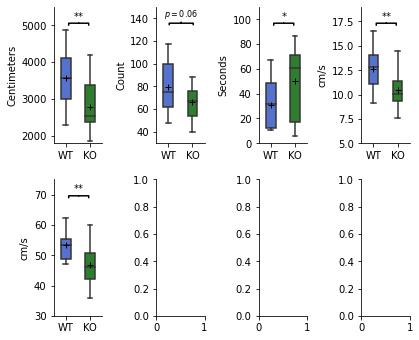

In [96]:
of_fig, of_ax = plt.subplots(ncols = 4, nrows = 2, figsize=(6,5))
sns.boxplot(data= of_raw, x='Genotype', y='Total_Distance', palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, ax=of_ax[0][0])
sns.despine()
of_ax[0][0].annotate(s='**', xy=(25, 120), xycoords='axes points', xytext=(0, 4), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
of_ax[0][0].set_ylabel('Centimeters')
of_ax[0][0].set_xlabel('')
#of_ax[0][0].title.set_text('Total Distance')
of_ax[0][0].set_ylim([1800, 5500])

sns.boxplot(data= of_raw, x='Genotype', y='Crosses', palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, ax=of_ax[0][1])
sns.despine()
of_ax[0][1].annotate(s=r'$p = 0.06$', xy=(25, 120), xycoords='axes points', xytext=(0, 7), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.2', lw=1.5, color='k'), fontsize = 8)
of_ax[0][1].set_ylabel('Count')
of_ax[0][1].set_xlabel('')
#of_ax[0][1].title.set_text('Crosses')
of_ax[0][1].set_ylim([30, 150])

#sns.boxplot(data= of_raw, x='Genotype', y='Time_Center(%)', palette=['forestgreen', 'royalblue'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, ax=of_ax[0][2], showfliers = False)
#of_ax[0][2].annotate(s='n.s', xy=(65, 125), xycoords='axes points', xytext=(0, 7), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=3.5, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
#of_ax[0][2].set_ylabel('Time (%)')
#of_ax[0][2].title.set_text('Time in Center')
#of_ax[0][2].set_ylim([0, 50])

sns.boxplot(data= of_raw, x='Genotype', y='Resting_Time_Total', palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, ax=of_ax[0][2])
sns.despine()
of_ax[0][2].annotate(s='*', xy=(25, 120), xycoords='axes points', xytext=(0, 4), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
of_ax[0][2].set_ylabel('Seconds')
of_ax[0][2].set_xlabel('')
#of_ax[0][1].title.set_text('Immobility')
of_ax[0][2].set_ylim([0, 110])

sns.boxplot(data= of_raw, x='Genotype', y='Mean_Speed', palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, ax=of_ax[0][3])
sns.despine()
of_ax[0][3].annotate(s='**', xy=(25, 120), xycoords='axes points', xytext=(-5, 4), textcoords='offset points', arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
of_ax[0][3].set_ylabel('cm/s')
of_ax[0][3].set_xlabel('')
#of_ax[1][0].title.set_text('Mean Speed')
of_ax[0][3].set_ylim([5, 19])

sns.boxplot(data= of_raw, x='Genotype', y='Max_Speed', palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, ax=of_ax[1][0], showfliers = False)
sns.despine()
of_ax[1][0].annotate(s='**', xy=(25,120), xycoords='axes points', xytext=(-5, 4), textcoords='offset points', arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
of_ax[1][0].set_ylabel('cm/s')
of_ax[1][0].set_xlabel('')
#of_ax[1][1].title.set_text('Max Speed')
of_ax[1][0].set_ylim([30, 75])
plt.tight_layout()


In [97]:
of_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/OF_paper2.svg')

## Social Interaction

Same approach

In [98]:
si_raw = pd.read_csv('/Users/labc02/Documents/PDCB_data/Behavior/Social Interaction/Social_Interaction_data.csv')

In [99]:
si_clean = si_raw[si_raw['Phase']== 'Sample']

In [100]:
si_clean.rename(columns={'Time Object/New Cons Chamber':'Time_Object', 'Time Conspecific Chamber': 'Time_Conspecific', 'Total Exploration': 'Total'}, inplace = True)

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [101]:
si_clean['Sociability']=((si_clean['Time_Conspecific']-si_clean['Time_Object'])/si_clean['Total']).round(2)

<ipython-input-101-50c93a3af3ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  si_clean['Sociability']=((si_clean['Time_Conspecific']-si_clean['Time_Object'])/si_clean['Total']).round(2)


In [102]:
for var_ in ['Time_Object', 'Time_Conspecific', 'Total', 'Sociability']:
    print(f'Normality test (Shapiro), {var_}')
    print(pg.normality(data=si_clean, dv=var_, group='Group'))

Normality test (Shapiro), Time_Object
            W      pval  normal
KOF  0.944423  0.516654    True
KOM  0.720208  0.000891   False
WTF  0.917846  0.301104    True
WTM  0.914444  0.275046    True
Normality test (Shapiro), Time_Conspecific
            W      pval  normal
KOF  0.928938  0.330071    True
KOM  0.924065  0.284459    True
WTF  0.948646  0.626702    True
WTM  0.861803  0.060766    True
Normality test (Shapiro), Total
            W      pval  normal
KOF  0.945061  0.525663    True
KOM  0.808731  0.008671   False
WTF  0.930491  0.415843    True
WTM  0.854802  0.049291   False
Normality test (Shapiro), Sociability
            W      pval  normal
KOF  0.910304  0.185149    True
KOM  0.899231  0.130518    True
WTF  0.899152  0.180488    True
WTM  0.872061  0.082392    True


In [103]:
for var_ in ['Time_Object', 'Time_Conspecific', 'Total']:
    print(f'Homoscedasticity test (Levene), {var_}')
    print(pg.homoscedasticity(data=si_clean, dv=var_, group='Group'))

Homoscedasticity test (Levene), Time_Object
               W      pval  equal_var
levene  0.319114  0.811481       True
Homoscedasticity test (Levene), Time_Conspecific
              W      pval  equal_var
levene  0.09542  0.962169       True
Homoscedasticity test (Levene), Total
               W      pval  equal_var
levene  1.871095  0.148406       True


In [104]:
si_tidy, si_out = detec_outlier(si_clean, ['Time_Object', 'Time_Conspecific', 'Total'], 'Group')

In [105]:
si_out

{2, 7, 13, 95, 119, 122}

In [106]:
for var_ in ['Time_Object', 'Time_Conspecific', 'Total']:
    print(f'Normality test (Shapiro), {var_}')
    print(pg.normality(data=si_tidy, dv=var_, group='Group'))

Normality test (Shapiro), Time_Object
            W      pval  normal
KOF  0.935501  0.442069    True
KOM  0.923020  0.382836    True
WTF  0.917846  0.301104    True
WTM  0.970216  0.896569    True
Normality test (Shapiro), Time_Conspecific
            W      pval  normal
KOF  0.931436  0.395579    True
KOM  0.916366  0.327636    True
WTF  0.948646  0.626702    True
WTM  0.930693  0.487973    True
Normality test (Shapiro), Total
            W      pval  normal
KOF  0.945132  0.567252    True
KOM  0.960652  0.793276    True
WTF  0.930491  0.415843    True
WTM  0.938467  0.565858    True


In [107]:
for var_ in ['Time_Object', 'Time_Conspecific', 'Total']:
    print(f'Normality test (Levene), {var_}')
    print(pg.homoscedasticity(data=si_tidy, dv=var_, group='Group'))

Normality test (Levene), Time_Object
               W      pval  equal_var
levene  0.992779  0.406591       True
Normality test (Levene), Time_Conspecific
               W      pval  equal_var
levene  0.611101  0.611966       True
Normality test (Levene), Total
               W      pval  equal_var
levene  4.142158  0.012347      False


In [108]:
samp_time = pd.melt(si_tidy, id_vars=['Subject', 'Group', 'Sex', 'Genotype'], value_vars=['Time_Object', 'Time_Conspecific'], var_name='Side', value_name='Time')

In [109]:
pg.anova(data=samp_time, dv='Time', between=['Sex', 'Genotype', 'Side'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,151.291092,1.0,151.291092,0.498434,4.823478e-01,0.006516
1,Genotype,309.317470,1.0,309.317470,1.019057,3.159460e-01,0.013231
2,Side,68571.428571,1.0,68571.428571,225.910915,1.806106e-24,0.748270
3,Sex * Genotype,115.598555,1.0,115.598555,0.380843,5.389967e-01,0.004986
4,Sex * Side,5320.438465,1.0,5320.438465,17.528366,7.538056e-05,0.187412
5,Genotype * Side,5495.574246,1.0,5495.574246,18.105357,5.897705e-05,0.192395
6,Sex * Genotype * Side,3896.114818,1.0,3896.114818,12.835883,5.975480e-04,0.144490
7,Residual,23068.511616,76.0,303.533048,NaN,NaN,NaN


### Geting complicated
Neither Sex or Genotype is a factor on their own, but side does. But the interaction Sex * Side IS significant. Genotype * Side IS ALSO significant.

There's sexual dimorfism in social interaction.

### Checking exploration time

In [110]:
pg.anova(data=si_tidy, dv='Total', between=['Sex', 'Genotype'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,302.582184,1.0,302.582184,0.995574,0.324695,0.025530
1,Genotype,618.634940,1.0,618.634940,2.035470,0.161832,0.050842
2,Sex * Genotype,231.197109,1.0,231.197109,0.760699,0.388588,0.019626
3,Residual,11549.238889,38.0,303.927339,NaN,NaN,NaN


There's no difference in the total time spent exploring both stimuli chambers.

### Social choice

In [111]:
pg.pairwise_ttests(samp_time, dv='Time', between=['Group', 'Side'], padjust='holm')

,Contrast,Group,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Group,-,KOF,KOM,False,True,-0.360258,27.840347,two-sided,7.213730e-01,1.000000e+00,holm,0.315,-0.112802
1,Group,-,KOF,WTF,False,True,0.204112,43.995160,two-sided,8.392069e-01,1.000000e+00,holm,0.298,0.059008
2,Group,-,KOF,WTM,False,True,0.167304,37.927020,two-sided,8.680197e-01,1.000000e+00,holm,0.309,0.050716
3,Group,-,KOM,WTF,False,True,0.487987,27.178388,two-sided,6.294729e-01,1.000000e+00,holm,0.334,0.152373
4,Group,-,KOM,WTM,False,True,0.460824,28.643679,two-sided,6.484047e-01,1.000000e+00,holm,0.343,0.141926
5,Group,-,WTF,WTM,False,True,-0.025415,36.210724,two-sided,9.798634e-01,1.000000e+00,holm,0.31,-0.007930
6,Side,-,Time_Object,Time_Conspecific,False,True,-12.099447,82.000000,two-sided,6.273782e-20,NaN,NaN,4.914e+16,-2.616093
7,Group * Side,KOF,Time_Object,Time_Conspecific,False,True,-6.272925,22.000000,two-sided,2.590145e-06,7.770436e-06,holm,4833.183,-2.472604
8,Group * Side,KOM,Time_Object,Time_Conspecific,False,True,-17.141410,18.000000,two-sided,1.355445e-12,5.421781e-12,holm,2.664e+09,-7.341962
9,Group * Side,WTF,Time_Object,Time_Conspecific,False,True,-4.708928,20.000000,two-sided,1.346051e-04,2.692102e-04,holm,156.234,-1.931645


### All groups show a preference for the Social Side

In [112]:
pg.anova(data=si_clean, dv='Sociability', between=['Sex', 'Genotype'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,0.097200,1.0,0.097200,3.013187,0.089589,0.064092
1,Genotype,0.200310,1.0,0.200310,6.209577,0.016547,0.123673
2,Sex * Genotype,0.129029,1.0,0.129029,3.999894,0.051700,0.083331
3,Residual,1.419361,44.0,0.032258,NaN,NaN,NaN


In [113]:
pg.pairwise_tukey(data=si_clean, dv='Sociability', between='Group')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KOF,KOM,0.189231,0.374615,-0.185385,0.070447,two-sided,-2.631542,0.045702,-0.999581
1,KOF,WTF,0.189231,0.163636,0.025594,0.073580,two-sided,0.347846,0.900000,0.137589
2,KOF,WTM,0.189231,0.140909,0.048322,0.073580,two-sided,0.656726,0.900000,0.259766
3,KOM,WTF,0.374615,0.163636,0.210979,0.073580,two-sided,2.867356,0.023959,1.134173
4,KOM,WTM,0.374615,0.140909,0.233706,0.073580,two-sided,3.176236,0.009428,1.256349
5,WTF,WTM,0.163636,0.140909,0.022727,0.076584,two-sided,0.296762,0.900000,0.121735


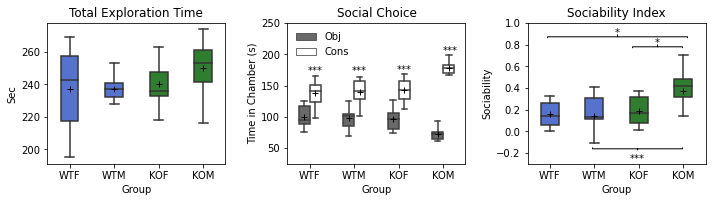

In [139]:
si_fig, si_axs = plt.subplots(ncols=3, nrows = 1, figsize = (10, 3))
sns.boxplot(data = si_tidy, x='Group', y='Total', ax =si_axs[0], palette=['royalblue', 'royalblue', 'forestgreen', 'forestgreen'], order = ['WTF', 'WTM', 'KOF', 'KOM'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4)
si_axs[0].title.set_text('Total Exploration Time')
si_axs[0].set_ylabel('Sec')

sns.boxplot(x='Group', y='Time', hue='Side', data=samp_time, palette=['dimgray', 'white'], order = ['WTF', 'WTM', 'KOF', 'KOM'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.5, ax=si_axs[1], showfliers = False)
handles, labels = si_axs[1].get_legend_handles_labels()
si_axs[1].set_ylim(25, 250)
si_axs[1].legend(handles=handles, labels=['Obj', 'Cons'], frameon=False)
si_axs[1].set_ylabel('Time in Chamber (s)')
ph_val = zip(['***', '***', '***', '***'], [20,64,109,155], [90, 90, 91, 110])
for text, x, y in ph_val:
    si_axs[1].annotate(s=text, xy=(x,y), xycoords='axes points', fontsize=10)
si_axs[1].title.set_text('Social Choice')

sns.boxplot(data=si_clean, x='Group', y='Sociability', palette=['royalblue', 'royalblue', 'forestgreen', 'forestgreen'], order = ['WTF', 'WTM', 'KOF', 'KOM'], width=.4, showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, ax=si_axs[2], showfliers = False)
si_axs[2].annotate(s='*', xy=(90, 125), xycoords='axes points', xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', arrowprops=dict(arrowstyle='-[, widthB=7, lengthB=.1', lw=1, color='k'))
si_axs[2].annotate(s='*', xy=(130, 115), xycoords='axes points', xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', arrowprops=dict(arrowstyle='-[, widthB=2.5, lengthB=.1', lw=1, color='k'))
si_axs[2].annotate('***', xy=(110,15), xytext=(110, 0), xycoords='axes points', ha='center', va='bottom', arrowprops=dict(arrowstyle='-[, widthB=4.5, lengthB=.1', lw=1, color='k'))
si_axs[2].set_ylim(-.3,1)
si_axs[2].title.set_text('Sociability Index')
plt.tight_layout(rect=[0, 0.03, 1, 1])

In [140]:
si_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/SI_fig2.svg')

### Collapsing Sex

In [141]:
si_tidy.columns

Index(['Subject', 'Group', 'Genotype', 'Sex', 'Phase', 'Entries Obj/New Cons',
       'Entries Conspecific', 'Time_Object', 'Time_Conspecific', 'Total',
       'Sociability'],
      dtype='object')

Sample sizes

In [142]:
si_tidy.groupby('Genotype')['Subject'].count()

Genotype
KO    22
WT    20
Name: Subject, dtype: int64

In [143]:
pg.normality(data = si_tidy, dv = 'Total', group = 'Genotype')

,W,pval,normal
KO,0.972475,0.767632,True
WT,0.972315,0.802817,True


In [144]:
pg.anova(data=samp_time, dv='Time', between=['Genotype', 'Side'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,311.300433,1.0,311.300433,0.765055,3.843696e-01,0.009473
1,Side,68571.428571,1.0,68571.428571,168.521810,2.187417e-21,0.678097
2,Genotype * Side,5545.125974,1.0,5545.125974,13.627756,4.055067e-04,0.145553
3,Residual,32551.954545,80.0,406.899432,NaN,NaN,NaN


Significant differences in the time exploring each side but not difference by sex.

The interaction genotype * sex is significant

In [145]:
pg.pairwise_ttests(data = samp_time, dv = 'Time', between = ['Genotype', 'Side'], padjust = 'bonf')

,Contrast,Genotype,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Genotype,-,KO,WT,False,True,0.499273,73.726692,two-sided,6.190739e-01,NaN,NaN,0.254,0.105891
1,Side,-,Time_Object,Time_Conspecific,False,True,-12.099447,82.000000,two-sided,6.273782e-20,NaN,NaN,4.914e+16,-2.616093
2,Genotype * Side,KO,Time_Object,Time_Conspecific,False,True,-11.049595,42.000000,two-sided,5.246974e-14,1.049395e-13,bonf,8.136e+10,-3.271730
3,Genotype * Side,WT,Time_Object,Time_Conspecific,False,True,-6.967331,38.000000,two-sided,2.722826e-08,5.445653e-08,bonf,3.348e+05,-2.159490


Both genotypes have a significant difference for a side

In [146]:
WT_mean = si_tidy['Total'][si_tidy['Genotype'] == 'WT'].mean()
WT_sem = si_tidy['Total'][si_tidy['Genotype'] == 'WT'].sem()
KO_mean = si_tidy['Total'][si_tidy['Genotype'] == 'KO'].mean()
KO_sem = si_tidy['Total'][si_tidy['Genotype'] == 'KO'].sem()
print(f'Total exploration time: \n WT mean: {WT_mean}, +- {WT_sem} SEM \n KO mean: {KO_mean}, +- {KO_sem} SEM')

Total exploration time: 
 WT mean: 237.2, +- 4.26651589645894 SEM 
 KO mean: 244.9090909090909, +- 3.343863728678262 SEM


In [147]:
pg.ttest(si_tidy['Total'][si_tidy['Genotype'] == 'WT'], si_tidy['Total'][si_tidy['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-1.422143,36.910345,two-sided,0.163381,"[-18.69, 3.28]",0.443553,0.676,0.28857


No difference in total exploration time

In [148]:
pg.normality(data=samp_time, dv = 'Time', group = 'Genotype')

,W,pval,normal
KO,0.930719,0.011061,False
WT,0.965371,0.254408,True


In [149]:
pg.mwu(x = samp_time['Time'][(samp_time['Genotype']=='WT') & (samp_time['Side'] == 'Time_Object')], y = samp_time['Time'][(samp_time['Genotype']=='WT')&(samp_time['Side']== 'Time_Conspecific')])

,U-val,tail,p-val,RBC,CLES
MWU,25.0,two-sided,0.000002,0.875,0.9325


In [150]:
pg.mwu(x = samp_time['Time'][(samp_time['Genotype']=='KO') & (samp_time['Side'] == 'Time_Object')], y = samp_time['Time'][(samp_time['Genotype']=='KO')&(samp_time['Side']== 'Time_Conspecific')])

,U-val,tail,p-val,RBC,CLES
MWU,4.0,two-sided,2.451042e-08,0.983471,0.991736


#### Sociability index

In [151]:
pg.normality(data = si_clean, dv = 'Sociability', group = 'Genotype')

,W,pval,normal
KO,0.979700,0.867493,True
WT,0.895777,0.024493,False


In [152]:
WT_median = si_clean['Sociability'][si_clean['Genotype'] == 'WT'].median()
#WT_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'WT'].sem()
KO_median = si_clean['Sociability'][si_clean['Genotype'] == 'KO'].median()
#KO_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'KO'].sem()
print(f'Sociability index: \n WT median: {WT_median} \n KO median: {KO_median}')

Sociability index: 
 WT median: 0.14 
 KO median: 0.32


In [153]:
pg.mwu(si_clean['Sociability'][si_clean['Genotype'] == 'WT'], si_clean['Sociability'][si_clean['Genotype'] == 'KO'])

,U-val,tail,p-val,RBC,CLES
MWU,174.5,two-sided,0.021554,0.38986,0.685315


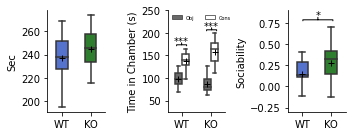

In [159]:
si_fig2, si_axs = plt.subplots(ncols=3, nrows = 1, figsize=(5,2))
sns.boxplot(data = si_tidy, x='Genotype', y='Total', ax =si_axs[0], palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4)
sns.despine()
#si_axs[0].title.set_text('Total Exploration Time')
si_axs[0].set_ylabel('Sec')
si_axs[0].set_xlabel('')

sns.boxplot(x='Genotype', y='Time', hue='Side', data=samp_time, palette=['dimgray', 'white'], order = ['WT', 'KO'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.5, ax=si_axs[1], showfliers = False)
handles, labels = si_axs[1].get_legend_handles_labels()
sns.despine()
si_axs[1].set_ylim(25, 250)
si_axs[1].legend(handles=handles, labels=['Obj', 'Cons'], frameon=False, prop={'size':5}, ncol = 2, loc = 2)
si_axs[1].set_ylabel('Time in Chamber (s)')
#si_axs[1].title.set_text('Social Choice')
si_axs[1].annotate(s='***', xy=(14, 65), xycoords='axes points', xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', arrowprops=dict(arrowstyle='-[, widthB=.5, lengthB=.1', lw=1, color='k'))
si_axs[1].annotate(s='***', xy=(44, 80), xycoords='axes points', xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', arrowprops=dict(arrowstyle='-[, widthB=.5, lengthB=.1', lw=1, color='k'))
si_axs[1].set_xlabel('')


sns.boxplot(data=si_clean, x='Genotype', y='Sociability', palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'], width=.4, showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, ax=si_axs[2], showfliers = False)
sns.despine()
#si_axs[2].title.set_text('Sociability Index')
si_axs[2].annotate(s='*', xy=(30, 90), xycoords='axes points', xytext=(0, 1.5), textcoords='offset points', ha='center', va='bottom', arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.1', lw=1, color='k'))
si_axs[2].set_ylim(-.3,.9)
si_axs[2].set_xlabel('')
plt.tight_layout()

In [160]:
si_fig2.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/SI2_paper2.svg') 

### Elevated Plus Maze

In [161]:
epm_raw= pd.read_csv('/Users/labc02/Documents/PDCB_data/Behavior/EPM/EPM_pool.csv')

In [162]:
epm_s2 = epm_raw[epm_raw['Session']=='Session 2']

Sample sizes

In [163]:
epm_s2.groupby('Genotype')['Subject_ID'].count()

Genotype
KO    16
WT    16
Name: Subject_ID, dtype: int64

### Total Distance

In [164]:
for var_ in ['Total_Distance', 'Entries_Center', 'Time_Open_Arms_Per']:
    print(f'Normality test (Shapiro), {var_}')
    print(pg.normality(data=epm_s2, dv=var_, group='Group'))

Normality test (Shapiro), Total_Distance
            W      pval  normal
KOF  0.851590  0.098863    True
KOM  0.929818  0.514424    True
WTF  0.816767  0.059766    True
WTM  0.811551  0.027644   False
Normality test (Shapiro), Entries_Center
            W      pval  normal
KOF  0.955353  0.764857    True
KOM  0.957675  0.787681    True
WTF  0.928904  0.541615    True
WTM  0.968282  0.879647    True
Normality test (Shapiro), Time_Open_Arms_Per
            W      pval  normal
KOF  0.827942  0.056510    True
KOM  0.976515  0.943657    True
WTF  0.941611  0.653274    True
WTM  0.971271  0.905373    True


In [165]:
for var_ in ['Total_Distance', 'Entries_Center', 'Time_Open_Arms_Per']:
    print(f'Homoscedasticity test (Levene), {var_}')
    print(pg.homoscedasticity(data=epm_s2, dv=var_, group='Group'))

Homoscedasticity test (Levene), Total_Distance
               W      pval  equal_var
levene  5.353429  0.004838      False
Homoscedasticity test (Levene), Entries_Center
               W      pval  equal_var
levene  0.440417  0.725893       True
Homoscedasticity test (Levene), Time_Open_Arms_Per
               W     pval  equal_var
levene  1.624102  0.20614       True


Technically a Welch anova is the most appropriate test since there's a small deviation from normality and homoscedasticity failed.

In [166]:
pg.welch_anova(data=epm_s2, dv='Total_Distance', between='Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,3,14.088487,4.793986,0.016689,0.339721


Nonetheless, all the aforementioned criteria just diminishes ANOVA power. Since the result is significant, Welch it is.

In [167]:
pg.anova(data=epm_s2, dv='Total_Distance', between=['Sex', 'Genotype'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,9.465538e+04,1.0,9.465538e+04,0.119104,0.732588,0.004236
1,Genotype,1.143753e+07,1.0,1.143753e+07,14.391699,0.000729,0.339493
2,Sex * Genotype,2.381816e+03,1.0,2.381816e+03,0.002997,0.956730,0.000107
3,Residual,2.225246e+07,28.0,7.947309e+05,NaN,NaN,NaN


ANOVA is significant for Genotype only

In [168]:
WT_median = epm_s2['Total_Distance'][epm_s2['Genotype'] == 'WT'].median()
#WT_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'WT'].sem()
KO_median = epm_s2['Total_Distance'][epm_s2['Genotype'] == 'KO'].median()
#KO_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'KO'].sem()
print(f'Total Distance: \n WT median: {WT_median} \n KO median: {KO_median}')

Total Distance: 
 WT median: 2561.005 
 KO median: 1702.2649999999999


In [169]:
pg.mwu(x=epm_s2['Total_Distance'][epm_s2['Genotype'] == 'WT'], y=epm_s2['Total_Distance'][epm_s2['Genotype'] == 'KO'])

,U-val,tail,p-val,RBC,CLES
MWU,205.0,two-sided,0.003937,-0.601562,0.800781


#### Crosses through center

In [170]:
pg.anova(data=epm_s2, dv='Entries_Center', between=['Sex', 'Genotype'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,3.639764,1.0,3.639764,0.050288,0.824191,0.001793
1,Genotype,72.685597,1.0,72.685597,1.004247,0.324867,0.034624
2,Sex * Genotype,82.458451,1.0,82.458451,1.139272,0.294923,0.039097
3,Residual,2026.589286,28.0,72.378189,NaN,NaN,NaN


No differences

In [171]:
WT_mean = epm_s2['Entries_Center'][epm_s2['Genotype'] == 'WT'].median()
WT_sem = epm_s2['Entries_Center'][epm_s2['Genotype'] == 'WT'].sem()
KO_mean = epm_s2['Entries_Center'][epm_s2['Genotype'] == 'KO'].median()
KO_sem = epm_s2['Entries_Center'][epm_s2['Genotype'] == 'KO'].sem()
print(f'Total Distance: \n WT median: {WT_mean} +- {WT_sem} sem \n KO median: {KO_mean} +- {KO_sem} sem')

Total Distance: 
 WT median: 22.5 +- 1.905857199967161 sem 
 KO median: 20.0 +- 2.273889380921303 sem


In [172]:
pg.ttest(x=epm_s2['Entries_Center'][epm_s2['Genotype'] == 'WT'], y=epm_s2['Entries_Center'][epm_s2['Genotype'] == 'KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.032201,30,two-sided,0.310228,"[-3.0, 9.12]",0.364938,0.505,0.169928


#### Time in Open Arms

In [173]:
pg.anova(data=epm_s2, dv='Time_Open_Arms_Per', between=['Sex', 'Genotype'])

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,125.112069,1.0,125.112069,1.843089,0.185431,0.061759
1,Genotype,674.282804,1.0,674.282804,9.933199,0.003847,0.261860
2,Sex * Genotype,3.672214,1.0,3.672214,0.054097,0.817773,0.001928
3,Residual,1900.688660,28.0,67.881738,NaN,NaN,NaN


Genotype is the only significant factor

In [174]:
pg.normality(data = epm_s2, dv = 'Time_Open_Arms_Per', group = 'Genotype')

,W,pval,normal
KO,0.734289,0.000413,False
WT,0.973177,0.887065,True


In [175]:
WT_median = epm_s2['Time_Open_Arms_Per'][epm_s2['Genotype'] == 'WT'].median()
#WT_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'WT'].sem()
KO_median = epm_s2['Time_Open_Arms_Per'][epm_s2['Genotype'] == 'KO'].median()
#KO_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'KO'].sem()
print(f'Total Distance: \n WT median: {WT_median} \n KO median: {KO_median}')

Total Distance: 
 WT median: 18.04 
 KO median: 6.37


In [176]:
pg.mwu(x=epm_s2['Time_Open_Arms_Per'][epm_s2['Genotype'] == 'WT'], y=epm_s2['Time_Open_Arms_Per'][epm_s2['Genotype'] == 'KO'])

,U-val,tail,p-val,RBC,CLES
MWU,208.0,two-sided,0.002733,-0.625,0.8125


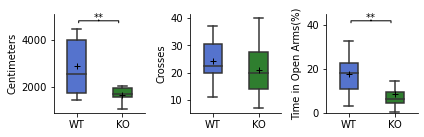

In [182]:
epm_fig, epm_axs = plt.subplots(ncols=3, nrows = 1, figsize = (6, 2))

sns.boxplot(data = epm_s2, x='Genotype', y='Total_Distance', ax =epm_axs[0], palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4)
sns.despine()
#epm_axs[0].title.set_text('Total Distance')
epm_axs[0].set_ylabel('Centimeters')
epm_axs[0].set_xlabel('')
epm_axs[0].set_ylim([900, 5100])
epm_axs[0].annotate(s='**', xy=(45, 90), xycoords='axes points', xytext=(45, 90), ha='center', va='bottom', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1, color='k'))

sns.boxplot(x='Genotype', y='Entries_Center', data=epm_s2, palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, ax=epm_axs[1])
sns.despine()
epm_axs[1].set_ylabel('Crosses')
epm_axs[1].set_xlabel('')
#epm_axs[1].title.set_text('Crosses through Center')

sns.boxplot(data=epm_s2, x='Genotype', y='Time_Open_Arms_Per', palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'], width=.4, showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, ax=epm_axs[2], showfliers=False)
sns.despine()
epm_axs[2].set_ylabel('Time in Open Arms(%)')
epm_axs[2].set_xlabel('')
epm_axs[2].annotate('**', xy=(45, 90), xytext=(45, 90), xycoords='axes points', ha='center', va='bottom', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1, color='k'))
#epm_axs[2].title.set_text('Time in Open Arms(%)')
epm_axs[2].set_ylim([0, 45])
plt.tight_layout(rect=[0, 0.03, 1, 1])


In [183]:
epm_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/EPM_paper2.svg')

### Burrowing

In [184]:
burr_tidy = pd.read_csv('/Users/labc02/Documents/PDCB_data/Behavior/Burrowing_data.csv')

Sample size

In [185]:
burr_tidy.groupby('Genotype').count()

,Sub,UR,Sex,Test (12 h),% Test (12 h),Total,Burrowed (g)
Genotype,,,,,,,
KO,31,31,31,31,31,31,31
WT,19,19,19,19,19,19,19


In [186]:
pg.normality(burr_tidy, dv = 'Burrowed (g)', group = 'Genotype')

,W,pval,normal
KO,0.895940,0.005716,False
WT,0.932928,0.196050,True


In [187]:
WT_median = burr_tidy['Burrowed (g)'][burr_tidy['Genotype'] == 'WT'].median()
#WT_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'WT'].sem()
KO_median = burr_tidy['Burrowed (g)'][burr_tidy['Genotype'] == 'KO'].median()
#KO_sem = of_raw['Resting_Time_Total'][of_raw['Genotype'] == 'KO'].sem()
print(f'Total Distance: \n WT median: {WT_median} \n KO median: {KO_median}')

Total Distance: 
 WT median: 322.81 
 KO median: 241.37


In [188]:
pg.mwu(burr_tidy['Burrowed (g)'][burr_tidy['Genotype'] == 'WT'], burr_tidy['Burrowed (g)'][burr_tidy['Genotype'] == 'KO'])

,U-val,tail,p-val,RBC,CLES
MWU,412.0,two-sided,0.019362,-0.398981,0.699491


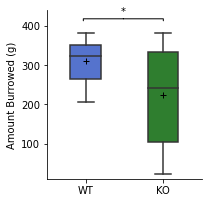

In [189]:
bur_fig, ax = plt.subplots(1,1, figsize=(3,3))
sns.boxplot(data=burr_tidy, x='Genotype', y='Burrowed (g)', showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, palette=['royalblue', 'forestgreen'], order = ['WT', 'KO'])
sns.despine()
ax.annotate('*', xy=(76, 160), xytext=(76, 162), xycoords='axes points', ha='center', va='bottom', arrowprops=dict(arrowstyle='-[, widthB=4, lengthB=.2', lw=1, color='k'))
ax.set_ylim(10, 440)
ax.set_xlabel('')
plt.ylabel('Amount Burrowed (g)')
plt.tight_layout()

In [190]:
bur_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/bur_paper2.svg')